In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
import itertools
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import scikitplot as skplt
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
data = df = pd.read_csv("aps_failure_training_set.csv", na_values='na')
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [3]:
test = pd.read_csv("aps_failure_test_set.csv", na_values='na')
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [4]:
data.shape

(60000, 171)

In [5]:
test.shape

(16000, 171)

In [6]:
data.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [7]:
print("Columns name :\n",list(data.columns))

Columns name :
 ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_00

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isna().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
data_missing =  missing_values_table(data)
data_missing.head(20)

Your selected dataframe has 171 columns.
There are 169 columns that have missing values.


,Missing Values,% of Total Values
br_000,49264,82.1
bq_000,48722,81.2
bp_000,47740,79.6
bo_000,46333,77.2
ab_000,46329,77.2
cr_000,46329,77.2
bn_000,44009,73.3
bm_000,39549,65.9
bl_000,27277,45.5
bk_000,23034,38.4


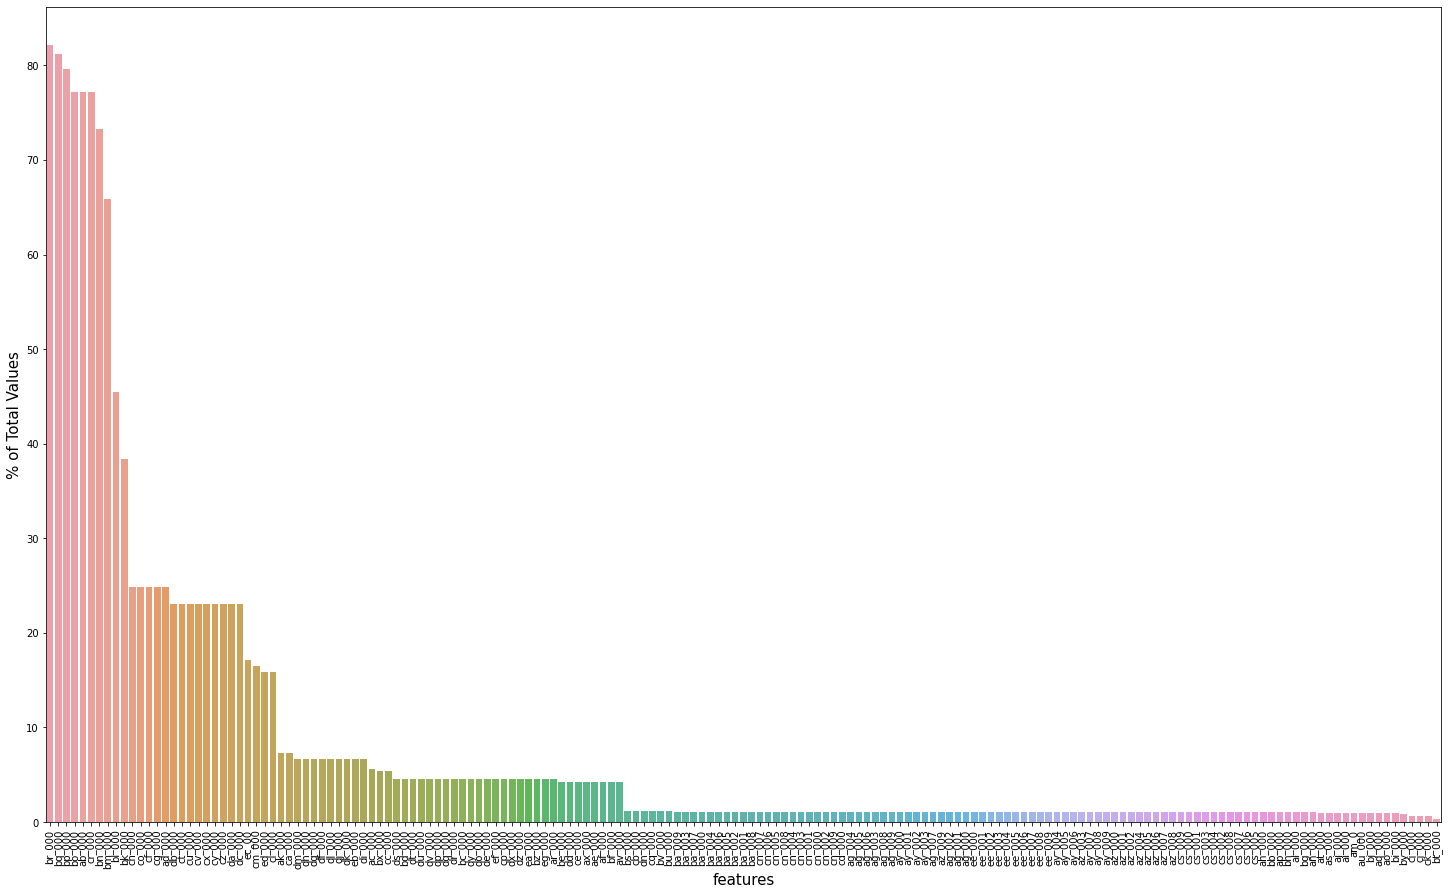

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize = (25,15))
sns.barplot(data_missing.index, data_missing['% of Total Values'], alpha = 0.9,order=data_missing.index)
plt.xticks(rotation = 'vertical')
plt.xlabel('features', fontsize =15)
plt.ylabel('% of Total Values', fontsize = 15)
plt.show()
plt.draw()

In [11]:
data = data.drop(['br_000','bq_000','bp_000','bo_000','ab_000','cr_000','bn_000','bm_000'],axis=1)

In [12]:
data.shape

(60000, 163)

In [13]:
col = list(data.columns)

In [14]:
print ('The train data has {} unique labels'.format(df['class'].nunique()))

The train data has 2 unique labels


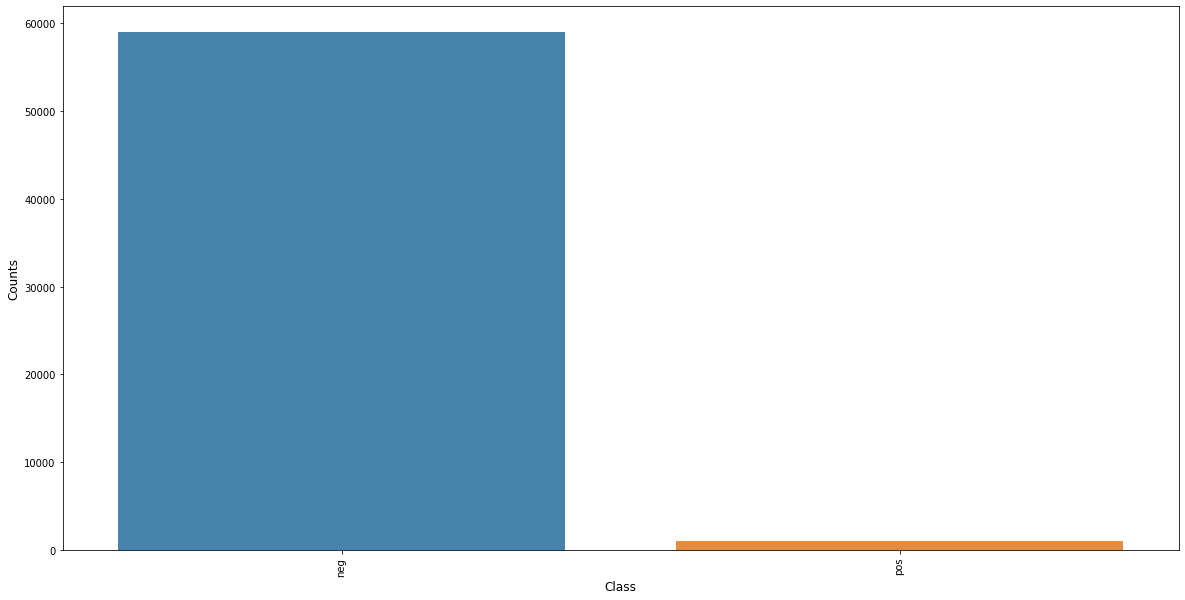

In [15]:
label_counts = df['class'].value_counts()
plt.figure(figsize = (20,10))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Class', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [16]:
print("Number of positive classes = ", sum(df['class'] == 'pos'))
print("Number of negative classes = ", sum(df['class'] == 'neg'))

Number of positive classes =  1000
Number of negative classes =  59000


In [17]:
data['class'] = data['class'].apply(lambda x: 0 if x == 'neg' else 1)
test['class'] = test['class'].apply(lambda x: 0 if x == 'neg' else 1)
data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# correlated columns

In [18]:
correlation_train = data.corr()
corr_dict = correlation_train['class'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.2) & (value<0.9)) | (value<=-0.2):
        important_columns.append(key)


In [19]:
len(important_columns)

91

In [20]:
print("correlated columns ",important_columns)

correlated columns  ['ci_000', 'bb_000', 'bv_000', 'bu_000', 'cq_000', 'bt_000', 'aa_000', 'aq_000', 'bj_000', 'ah_000', 'an_000', 'bg_000', 'ao_000', 'cc_000', 'ap_000', 'bx_000', 'by_000', 'bh_000', 'dn_000', 'ee_005', 'ba_004', 'cn_004', 'ck_000', 'ba_003', 'ba_005', 'ag_005', 'ee_002', 'cs_005', 'ba_001', 'cs_004', 'ag_003', 'az_005', 'ba_000', 'ee_003', 'bi_000', 'ba_002', 'dt_000', 'ds_000', 'ee_004', 'ee_006', 'ee_000', 'ay_008', 'cn_003', 'ed_000', 'ba_006', 'cs_003', 'cn_001', 'am_0', 'al_000', 'cm_000', 'cs_002', 'ec_00', 'ag_004', 'cn_005', 'ag_006', 'cn_002', 'ee_001', 'az_004', 'do_000', 'cs_000', 'dc_000', 'dd_000', 'cv_000', 'ag_002', 'ba_007', 'dp_000', 'cx_000', 'cj_000', 'cs_001', 'ay_007', 'az_001', 'dv_000', 'de_000', 'ce_000', 'ba_008', 'di_000', 'ag_007', 'bc_000', 'ee_008', 'eb_000', 'ay_006', 'cn_000', 'bd_000', 'cs_006', 'ba_009', 'bf_000', 'ay_005', 'du_000', 'az_007', 'az_000', 'bz_000']


In [21]:
df[important_columns].head()

,ci_000,bb_000,bv_000,bu_000,cq_000,bt_000,aa_000,aq_000,bj_000,ah_000,...,cn_000,bd_000,cs_006,ba_009,bf_000,ay_005,du_000,az_007,az_000,bz_000
0,5245752.00,6700214.0,6700214.0,6700214.0,6700214.0,76698.08,76698,1132040.0,799478.0,2551696.0,...,0.0,10.0,895240.0,0.0,50.0,469014.0,14745580.0,4.0,5374.0,68656.0
1,2291079.36,3646660.0,3646660.0,3646660.0,3646660.0,33057.51,33058,338544.0,392208.0,1393352.0,...,0.0,454.0,301242.0,4708.0,350.0,71510.0,4510080.0,6.0,7336.0,260120.0
2,2322692.16,2673338.0,2673338.0,2673338.0,2673338.0,41040.08,41040,153698.0,139730.0,1234132.0,...,0.0,202.0,488302.0,0.0,4.0,0.0,300240.0,0.0,1620.0,7466.0
3,2135.04,21614.0,21614.0,21614.0,21614.0,12.69,12,1014.0,3090.0,2668.0,...,0.0,12.0,388.0,0.0,0.0,0.0,15740.0,1692.0,64.0,50.0
4,3565684.80,4289260.0,4289260.0,4289260.0,4289260.0,60874.03,60874,551022.0,399410.0,1974038.0,...,0.0,556.0,1137268.0,0.0,2.0,372236.0,457040.0,0.0,1644.0,17052.0


# Impute Missing Value using SimpleImputer

In [22]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df[important_columns])
X_mean = imp.transform(df[important_columns])

In [23]:
X_mean = pd.DataFrame(X_mean,columns=[important_columns])
X_mean.head()

,ci_000,bb_000,bv_000,bu_000,cq_000,bt_000,aa_000,aq_000,bj_000,ah_000,...,cn_000,bd_000,cs_006,ba_009,bf_000,ay_005,du_000,az_007,az_000,bz_000
0,5245752.00,6700214.0,6700214.0,6700214.0,6700214.0,76698.08,76698.0,1132040.0,799478.0,2551696.0,...,0.0,10.0,895240.0,0.0,50.0,469014.0,14745580.0,4.0,5374.0,68656.0
1,2291079.36,3646660.0,3646660.0,3646660.0,3646660.0,33057.51,33058.0,338544.0,392208.0,1393352.0,...,0.0,454.0,301242.0,4708.0,350.0,71510.0,4510080.0,6.0,7336.0,260120.0
2,2322692.16,2673338.0,2673338.0,2673338.0,2673338.0,41040.08,41040.0,153698.0,139730.0,1234132.0,...,0.0,202.0,488302.0,0.0,4.0,0.0,300240.0,0.0,1620.0,7466.0
3,2135.04,21614.0,21614.0,21614.0,21614.0,12.69,12.0,1014.0,3090.0,2668.0,...,0.0,12.0,388.0,0.0,0.0,0.0,15740.0,1692.0,64.0,50.0
4,3565684.80,4289260.0,4289260.0,4289260.0,4289260.0,60874.03,60874.0,551022.0,399410.0,1974038.0,...,0.0,556.0,1137268.0,0.0,2.0,372236.0,457040.0,0.0,1644.0,17052.0


In [24]:
X_test = imp.transform(test[important_columns])

In [25]:
X_test = pd.DataFrame(X_test,columns=[important_columns])
X_test.head()

,ci_000,bb_000,bv_000,bu_000,cq_000,bt_000,aa_000,aq_000,bj_000,ah_000,...,cn_000,bd_000,cs_006,ba_009,bf_000,ay_005,du_000,az_007,az_000,bz_000
0,5913.60,124340.0,124340.0,124340.0,124340.0,59.53,60.0,470.0,3458.0,3976.0,...,0.0,6.0,7650.0,0.0,0.0,0.0,780.0,2948.0,1956.0,686.0
1,7224.96,46894.0,46894.0,46894.0,46894.0,81.89,82.0,1270.0,3134.0,5244.0,...,0.0,2.0,9622.0,128.0,0.0,0.0,37580.0,0.0,280.0,0.0
2,3594885.12,4644422.0,4644422.0,4644422.0,4644422.0,66002.89,66002.0,286536.0,265492.0,1891670.0,...,0.0,7848.0,322718.0,210866.0,0.0,24286.0,9520.0,123828.0,22984.0,2272.0
3,3387773.76,4201350.0,4201350.0,4201350.0,4201350.0,59816.46,59816.0,423374.0,316130.0,1772828.0,...,0.0,238.0,926846.0,0.0,16.0,6388.0,2718360.0,0.0,3526.0,26214.0
4,94319.04,110094.0,110094.0,110094.0,110094.0,1813.74,1814.0,5092.0,4966.0,48978.0,...,0.0,4.0,63436.0,0.0,0.0,11544.0,2140.0,0.0,126.0,330.0


In [26]:
X = X_mean
y = data['class']

In [27]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
mx.fit(X)
X_std = mx.transform(X)
type(X_std)

numpy.ndarray

In [28]:
X_std = pd.DataFrame(X_std,columns = [important_columns])
X_std.head()

,ci_000,bb_000,bv_000,bu_000,cq_000,bt_000,aa_000,aq_000,bj_000,ah_000,...,cn_000,bd_000,cs_006,ba_009,bf_000,ay_005,du_000,az_007,az_000,bz_000
0,0.037208,0.034739,0.034739,0.034739,0.034739,0.027925,0.027925,0.044285,0.017480,0.034368,...,0.0,0.000033,0.012140,0.000000,0.000979,0.003754,0.032041,1.021497e-07,0.000531,0.001693
1,0.016250,0.018907,0.018907,0.018907,0.018907,0.012036,0.012036,0.013244,0.008575,0.018766,...,0.0,0.001481,0.004085,0.000108,0.006856,0.000572,0.009800,1.532245e-07,0.000725,0.006416
2,0.016475,0.013861,0.013861,0.013861,0.013861,0.014942,0.014942,0.006013,0.003055,0.016622,...,0.0,0.000659,0.006622,0.000000,0.000078,0.000000,0.000652,0.000000e+00,0.000160,0.000184
3,0.000015,0.000112,0.000112,0.000112,0.000112,0.000005,0.000004,0.000040,0.000068,0.000036,...,0.0,0.000039,0.000005,0.000000,0.000000,0.000000,0.000034,4.320932e-05,0.000006,0.000001
4,0.025291,0.022239,0.022239,0.022239,0.022239,0.022164,0.022164,0.021556,0.008733,0.026587,...,0.0,0.001814,0.015422,0.000000,0.000039,0.002979,0.000993,0.000000e+00,0.000162,0.000421


In [29]:
X_test_std = mx.transform(X_test)
X_test_std = pd.DataFrame(X_test_std,columns = [important_columns])
X_test_std.head()

,ci_000,bb_000,bv_000,bu_000,cq_000,bt_000,aa_000,aq_000,bj_000,ah_000,...,cn_000,bd_000,cs_006,ba_009,bf_000,ay_005,du_000,az_007,az_000,bz_000
0,0.000042,0.000645,0.000645,0.000645,0.000645,0.000022,0.000022,0.000018,0.000076,0.000054,...,0.0,0.000020,0.000104,0.000000,0.000000,0.000000,0.000002,0.000075,0.000193,0.000017
1,0.000051,0.000243,0.000243,0.000243,0.000243,0.000030,0.000030,0.000050,0.000069,0.000071,...,0.0,0.000007,0.000130,0.000003,0.000000,0.000000,0.000082,0.000000,0.000028,0.000000
2,0.025498,0.024080,0.024080,0.024080,0.024080,0.024031,0.024031,0.011209,0.005805,0.025478,...,0.0,0.025609,0.004376,0.004825,0.000000,0.000194,0.000021,0.003162,0.002270,0.000056
3,0.024029,0.021783,0.021783,0.021783,0.021783,0.021779,0.021778,0.016562,0.006912,0.023877,...,0.0,0.000777,0.012569,0.000000,0.000313,0.000051,0.005907,0.000000,0.000348,0.000647
4,0.000669,0.000571,0.000571,0.000571,0.000571,0.000660,0.000660,0.000199,0.000109,0.000660,...,0.0,0.000013,0.000860,0.000000,0.000000,0.000092,0.000005,0.000000,0.000012,0.000008


In [30]:
X.shape ,y.shape

((60000, 91), (60000,))

In [31]:
data['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

# TSNE

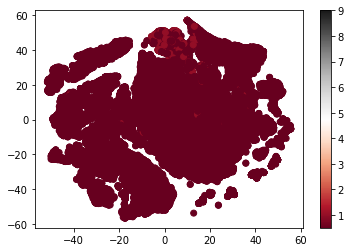

In [32]:
xtsne = TSNE(perplexity=100)
results=xtsne.fit_transform(X_mean)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=y, cmap = "RdGy")
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
%time clf.fit(X_std,y)

Wall time: 974 ms


LogisticRegression()

In [34]:
pred = clf.predict(X_test_std)

Accuracy Score  0.9839375
Recall Score  0.7757009345794392
[[15577   209]
 [   48   166]]


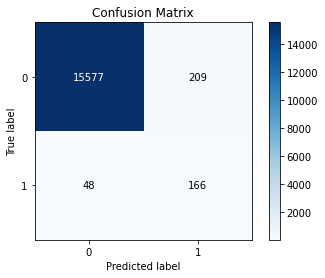

In [35]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

# Cost

In [36]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

26090

In [37]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

# RandomizedSearchCV

In [38]:
random_grid = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}


clf = LogisticRegression()

rf_random = RandomizedSearchCV(estimator = clf, 
                               param_distributions = random_grid, 
                               cv = 10, 
                               verbose=2,
                               random_state=42, 
                               n_jobs = -1)

%time rf_random.fit(X_std,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 34.3 s


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2']},
                   random_state=42, verbose=2)

In [39]:
rf_random.best_params_

{'penalty': 'l2', 'C': 1000.0}

# On Best Parameter 

In [40]:
clf = LogisticRegression(penalty = 'l2' ,C = 1000.0 )
%time clf.fit(X_std,y)

Wall time: 1.36 s


LogisticRegression(C=1000.0)

In [41]:
pred = clf.predict(X_test_std)

Accuracy Score  0.9884375
Recall Score  0.8392857142857143
[[15580   140]
 [   45   235]]


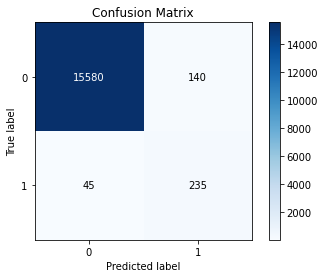

In [42]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [43]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

23900

#  Support vector Machine

In [44]:
from sklearn.svm import SVC
svm = SVC()
%time svm.fit(X_std,y)

Wall time: 39.6 s


SVC()

In [45]:
pred = svm.predict(X_test_std)

Accuracy Score  0.9855
Recall Score  0.8823529411764706
[[15603   210]
 [   22   165]]


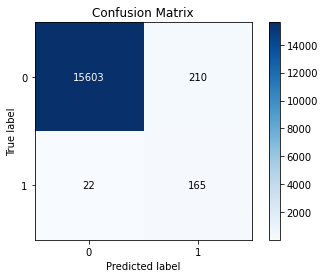

In [46]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

# Cost

In [47]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

13100

# Random Search

In [48]:
parameters = [ {'kernel' : ['rbf'], 'C' : [0.1, 1, 10, 100, 1000]}]

rf_random = RandomizedSearchCV(estimator = svm, 
                               param_distributions = parameters, 
                               cv = 10, 
                               verbose=2,
                               random_state=42, 
                               n_jobs = -1)

%time rf_random.fit(X_std,y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Wall time: 17min 54s


RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
                   param_distributions=[{'C': [0.1, 1, 10, 100, 1000],
                                         'kernel': ['rbf']}],
                   random_state=42, verbose=2)

In [49]:
rf_random.best_params_

{'kernel': 'rbf', 'C': 10}

# On Best Parameter

In [50]:
svm = SVC(kernel='rbf',C=10)
%time svm.fit(X_std,y)

Wall time: 59.8 s


SVC(C=10)

In [51]:
pred = svm.predict(X_test_std)

Accuracy Score  0.987125
Recall Score  0.9004739336492891
[[15604   185]
 [   21   190]]


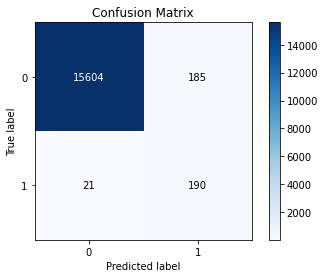

In [52]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

# Cost

In [53]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

12350

# K Neighbors Classifier

In [54]:
knn = KNeighborsClassifier()
%time knn.fit(X_std,y)

Wall time: 15.9 ms


KNeighborsClassifier()

In [55]:
pred = knn.predict(X_test_std)

Accuracy Score  0.9874375
Recall Score  0.8686440677966102
[[15594   170]
 [   31   205]]


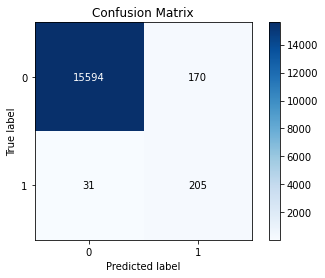

In [56]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

# Cost

In [57]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

17200

# Random Search

In [58]:
param_grid = dict(n_neighbors = list(range(1, 26)))

rf_random = RandomizedSearchCV(estimator = knn, 
                               param_distributions = param_grid, 
                               cv = 10, 
                               verbose=2,
                               random_state=42, 
                               n_jobs = -1)

%time rf_random.fit(X_std,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 20min 5s


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25]},
                   random_state=42, verbose=2)

In [59]:
rf_random.best_params_

{'n_neighbors': 1}

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)
%time knn.fit(X,y)

Wall time: 168 ms


KNeighborsClassifier(n_neighbors=1)

In [61]:
pred = knn.predict(X_test_std)

Accuracy Score  0.9765625
Recall Score  0.0
[[15625   375]
 [    0     0]]


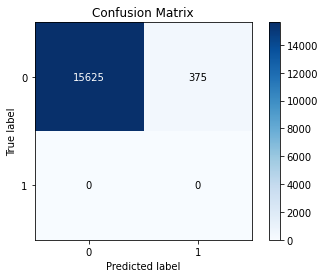

In [62]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

# Cost

In [63]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

3750

# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
%time clf.fit(X,y)

Wall time: 45.9 s


RandomForestClassifier()

In [65]:
pred = clf.predict(X_test)

Accuracy Score  0.9918125
Recall Score  0.9295774647887324
[[15605   111]
 [   20   264]]


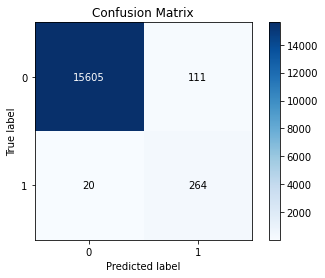

In [66]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [67]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

11110

# Random Search

In [68]:
random_grid = {'n_estimators': [100,300,500,600,700,800],
          'max_depth': [5,10,15,20,25,50]}

clf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = clf, 
                               param_distributions = random_grid, 
                               cv = 10, 
                               verbose=2,
                               random_state=42, 
                               n_jobs = -1)

%time rf_random.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 1h 1min 48s


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 50],
                                        'n_estimators': [100, 300, 500, 600,
                                                         700, 800]},
                   random_state=42, verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 500, 'max_depth': 25}

In [70]:
clf = RandomForestClassifier(n_estimators = 500,max_depth=25)
%time clf.fit(X,y)

Wall time: 3min 47s


RandomForestClassifier(max_depth=25, n_estimators=500)

In [71]:
pred = clf.predict(X_test)

Accuracy Score  0.992
Recall Score  0.9273356401384083
[[15604   107]
 [   21   268]]


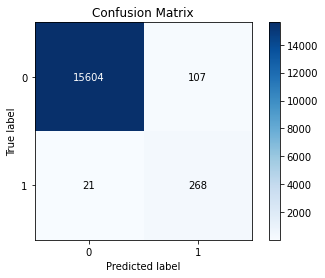

In [72]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [73]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

11570

# Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
%time clf1.fit(X,y)

Wall time: 9.4 s


DecisionTreeClassifier()

In [75]:
pred = clf1.predict(X_test)

Accuracy Score  0.987625
Recall Score  0.7492957746478873
[[15536   109]
 [   89   266]]


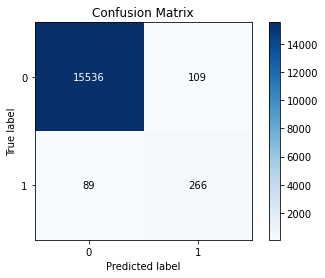

In [76]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [77]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

45590

# Random Search

In [78]:
parameters = {'max_depth': np.random.randint(10,25,5)}

rf_random = RandomizedSearchCV(estimator = clf1, 
                               param_distributions = parameters, 
                               n_iter = 100,
                               cv = 10, 
                               verbose=2,
                               random_state=42, 
                               n_jobs = -1)

%time rf_random.fit(X,y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Wall time: 1min 3s


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([20, 13, 12, 15, 13])},
                   random_state=42, verbose=2)

In [79]:
rf_random.best_params_

{'max_depth': 12}

In [80]:
clf1 = DecisionTreeClassifier(max_depth =13)
%time clf1.fit(X,y)

Wall time: 5.24 s


DecisionTreeClassifier(max_depth=13)

In [81]:
pred = clf1.predict(X_test)

Accuracy Score  0.9895
Recall Score  0.8438538205980066
[[15578   121]
 [   47   254]]


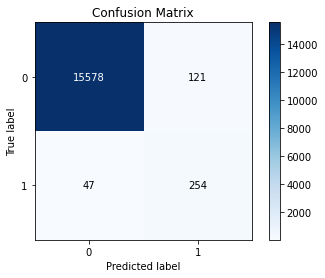

In [82]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [83]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

24710

# XGB Classifier

In [84]:
from xgboost import XGBClassifier
xg = XGBClassifier()
%time xg.fit(X,y)

[08:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 13.6 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
pred = xg.predict(X_test)

Accuracy Score  0.99325
Recall Score  0.9435215946843853
[[15608    91]
 [   17   284]]


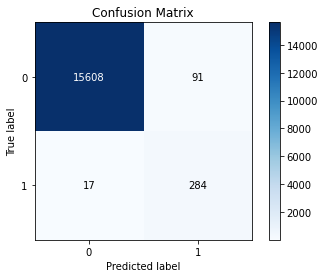

In [86]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [87]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

9410

# Random Search

In [88]:
random_grid = { 'n_estimators': [100, 200, 500],
                'learning_rate': [0.01,0.05,0.1,0.2],
                'base_score': [0.2, 0.5, 1],
                'max_depth': range(3,10,2),
}

rf_random = RandomizedSearchCV(estimator = xg, 
                               param_distributions = random_grid, 
                               cv = 10, 
                               verbose=2,
                               random_state=42, 
                               n_jobs = -1)

%time rf_random.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[08:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 36min 5s


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                      

In [89]:
rf_random.best_params_

{'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'base_score': 0.5}

In [90]:
xg = XGBClassifier(n_estimators=500,learning_rate=0.1,base_score=0.2)
%time xg.fit(X,y)

[08:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 4s


XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
pred = xg.predict(X_test)

Accuracy Score  0.9939375
Recall Score  0.9572368421052632
[[15612    84]
 [   13   291]]


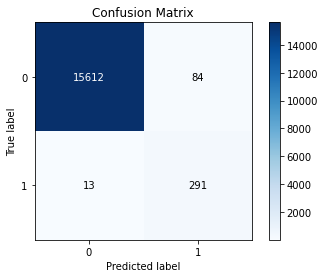

In [92]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [93]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

7340

In [94]:
import pickle

Pkl_Filename = "XGBClassifier.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xg, file)

# Gradient Boosting Classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
%time gb.fit(X,y)

Wall time: 1min 56s


GradientBoostingClassifier()

In [96]:
pred = gb.predict(X_test)

Accuracy Score  0.9904375
Recall Score  0.8936170212765957
[[15595   123]
 [   30   252]]


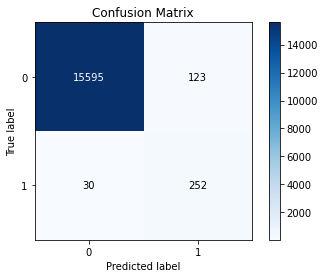

In [97]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [98]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

16230

# Random Search

In [99]:
parameters = {"n_estimators":[5,50,100,200,500,700],
              "max_depth":[1,3,5,7,9],
              "learning_rate":[0.01,0.1,1]}

rf_random = RandomizedSearchCV(gb,parameters,cv=5 ,verbose=2,random_state=42, n_jobs = -1)

%time rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 1h 29min 20s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 100, 200, 500,
                                                         700]},
                   random_state=42, verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}

In [101]:
gb = GradientBoostingClassifier(n_estimators=500,max_depth=3,learning_rate=0.1)
%time gb.fit(X,y)

Wall time: 13min 33s


GradientBoostingClassifier(n_estimators=500)

In [102]:
pred = gb.predict(X_test)

Accuracy Score  0.992
Recall Score  0.8971061093247589
[[15593    96]
 [   32   279]]


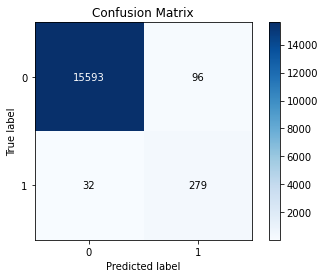

In [103]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [104]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

16960

# Voting Classifier

In [105]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [106]:
clf2 = RandomForestClassifier(n_estimators = 500,max_depth=25)
clf3 = XGBClassifier(n_estimators=500,learning_rate=0.1,base_score=0.2)
clf4 = GradientBoostingClassifier(n_estimators=500,max_depth=3,learning_rate=0.1)

In [107]:
vt = VotingClassifier(estimators=[ ('clf', clf2), ('xg', clf3),('gb', clf4)], weights=[1,1,1], voting='soft')
%time vt.fit(X, y)

[10:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 14min 58s


VotingClassifier(estimators=[('clf',
                              RandomForestClassifier(max_depth=25,
                                                     n_estimators=500)),
                             ('xg',
                              XGBClassifier(base_score=0.2, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_est

In [108]:
pred = vt.predict(X_test)

Accuracy Score  0.99325
Recall Score  0.9435215946843853
[[15608    91]
 [   17   284]]


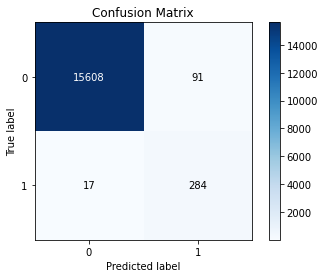

In [109]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [110]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

9410

# Custom Stacking classifier:

In [111]:
def stacking_classifer(X,y,n_estimators,Xtest,Y_test ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)
    X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5,stratify = y_train, random_state=42)
    
    list_input_data =[]
    list_output_data =[]

    for i in range(0,n_estimators):
        
        selecting_rows = np.random.choice(list(range(X_train1.shape[0])),size=int(0.6 * len(X_train1)),replace=True)
        sample_data = X_train1.iloc[selecting_rows,:]
        target_of_sample_data = y_train1.iloc[selecting_rows]
        
        list_input_data.append(sample_data)
        list_output_data.append(target_of_sample_data)
           
    models = {}
    
    for i in tqdm(range(n_estimators)):
        best_model = XGBClassifier() 
        best_model.fit( list_input_data[i] , list_output_data[i] )
        models['model_'+str(i)] = best_model
        
    predictions = []
    for model in models.values():
        y_pred = model.predict(X_train2)   
        predictions.append(y_pred)
        
    df = pd.DataFrame()
    for i in range(len(models)):
        df['prediction_'+str(i)] = predictions[i]
        
    meta_model  = LogisticRegression()
    meta_model.fit(df,y_train2)
        
    prediction = []
    for model in models.values():
        y_pred = model.predict(Xtest)
        prediction.append(y_pred)
                          
    df2 = pd.DataFrame()
    for i in range(len(models)):
        df2['prediction_'+str(i)] = prediction[i]
                          
    ypred = meta_model.predict(df2)
                          
    return ypred
        

In [112]:
pred = stacking_classifer(X,y,20,X_test,test['class'])

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

[10:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  5%|████▏                                                                              | 1/20 [00:01<00:33,  1.78s/it]

[10:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████▎                                                                          | 2/20 [00:03<00:35,  1.95s/it]

[10:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 15%|████████████▍                                                                      | 3/20 [00:05<00:33,  1.99s/it]

[10:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|████████████████▌                                                                  | 4/20 [00:07<00:31,  1.95s/it]

[10:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 25%|████████████████████▊                                                              | 5/20 [00:09<00:30,  2.02s/it]

[10:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 30%|████████████████████████▉                                                          | 6/20 [00:12<00:29,  2.07s/it]

[10:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 35%|█████████████████████████████                                                      | 7/20 [00:14<00:27,  2.08s/it]

[10:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|█████████████████████████████████▏                                                 | 8/20 [00:15<00:23,  1.97s/it]

[10:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 45%|█████████████████████████████████████▎                                             | 9/20 [00:17<00:21,  1.95s/it]

[10:52:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████████████████████████████████████████                                         | 10/20 [00:19<00:19,  1.92s/it]

[10:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 55%|█████████████████████████████████████████████                                     | 11/20 [00:21<00:18,  2.02s/it]

[10:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:23<00:15,  1.98s/it]

[10:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:26<00:14,  2.06s/it]

[10:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:28<00:12,  2.03s/it]

[10:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:29<00:10,  2.01s/it]

[10:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:31<00:07,  2.00s/it]

[10:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:34<00:06,  2.13s/it]

[10:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:36<00:04,  2.19s/it]

[10:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:38<00:02,  2.19s/it]

[10:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.05s/it]


In [113]:
pred.shape

(16000,)

Accuracy Score  0.9915625
Recall Score  0.9477611940298507
[[15611   121]
 [   14   254]]


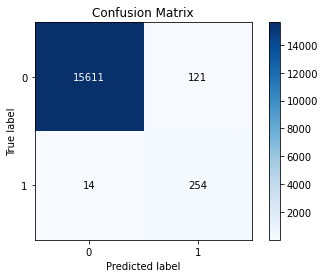

In [114]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [115]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
cost

8210

# Custom Stacking Classifier

In [116]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [117]:
def StackingClassifier(X,y,n_estimators,Xtest,Y_test ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=42)
    X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5,stratify = y_train, random_state=42)
    
    list_input_data =[]
    list_output_data =[]

    for i in range(0,n_estimators):
        
        selecting_rows = np.random.choice(list(range(X_train1.shape[0])),size=int(0.6 * len(X_train1)),replace=True)
        sample_data = X_train1.iloc[selecting_rows,:]
        target_of_sample_data = y_train1.iloc[selecting_rows]
        
        list_input_data.append(sample_data)
        list_output_data.append(target_of_sample_data)
           
    models = {}
    
    for i in tqdm(range(n_estimators)):
        clf2 = RandomForestClassifier(n_estimators = 500,max_depth=25,n_jobs = -1)
        clf3 = XGBClassifier(n_estimators=500,learning_rate=0.1,base_score=0.2)
        clf1 = GradientBoostingClassifier(n_estimators=500,max_depth=3,learning_rate=0.1)
        best_model = np.random.choice([clf1,clf2,clf3])
        best_model.fit( list_input_data[i] , list_output_data[i] )
        models['model_'+str(i)] = best_model
        
    predictions = []
    for model in models.values():
        y_pred = model.predict(X_train2)   
        predictions.append(y_pred)
        
    df = pd.DataFrame()
    for i in range(len(models)):
        df['prediction_'+str(i)] = predictions[i]
        
    meta_model  = LogisticRegression()
    meta_model.fit(df,y_train2)
        
    prediction = []
    for model in models.values():
        y_pred = model.predict(Xtest)
        prediction.append(y_pred)
                          
    df2 = pd.DataFrame()
    for i in range(len(models)):
        df2['prediction_'+str(i)] = prediction[i]
                          
    ypred = meta_model.predict(df2)
                          
    return ypred
        

In [118]:
esti = [20,50,100,200]
for i in esti:
    pred = stacking_classifer(X,y,i,X_test,test['class'])
    print("Recall Score ",recall_score(pred,test['class']))
    tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
    cost = 10*fp + 500*fn
    print(cost)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

[10:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  5%|████▏                                                                              | 1/20 [00:01<00:37,  1.96s/it]

[10:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████▎                                                                          | 2/20 [00:04<00:37,  2.07s/it]

[10:52:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 15%|████████████▍                                                                      | 3/20 [00:06<00:36,  2.15s/it]

[10:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|████████████████▌                                                                  | 4/20 [00:08<00:35,  2.21s/it]

[10:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 25%|████████████████████▊                                                              | 5/20 [00:11<00:34,  2.27s/it]

[10:52:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 30%|████████████████████████▉                                                          | 6/20 [00:13<00:30,  2.20s/it]

[10:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 35%|█████████████████████████████                                                      | 7/20 [00:15<00:29,  2.25s/it]

[10:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|█████████████████████████████████▏                                                 | 8/20 [00:17<00:26,  2.22s/it]

[10:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 45%|█████████████████████████████████████▎                                             | 9/20 [00:19<00:24,  2.20s/it]

[10:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████████████████████████████████████████                                         | 10/20 [00:21<00:21,  2.15s/it]

[10:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 55%|█████████████████████████████████████████████                                     | 11/20 [00:24<00:19,  2.20s/it]

[10:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:26<00:17,  2.22s/it]

[10:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:28<00:15,  2.15s/it]

[10:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:30<00:13,  2.19s/it]

[10:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:32<00:10,  2.19s/it]

[10:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:35<00:08,  2.20s/it]

[10:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:37<00:06,  2.21s/it]

[10:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:39<00:04,  2.18s/it]

[10:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:41<00:02,  2.16s/it]

[10:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:43<00:00,  2.19s/it]


Recall Score  0.9122807017543859
13650


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

[10:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  2%|█▋                                                                                 | 1/50 [00:01<01:35,  1.95s/it]

[10:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  4%|███▎                                                                               | 2/50 [00:04<01:48,  2.27s/it]

[10:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  6%|████▉                                                                              | 3/50 [00:06<01:47,  2.28s/it]

[10:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  8%|██████▋                                                                            | 4/50 [00:08<01:42,  2.22s/it]

[10:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████▎                                                                          | 5/50 [00:10<01:38,  2.19s/it]

[10:53:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 12%|█████████▉                                                                         | 6/50 [00:12<01:33,  2.12s/it]

[10:53:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 14%|███████████▌                                                                       | 7/50 [00:14<01:28,  2.07s/it]

[10:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 16%|█████████████▎                                                                     | 8/50 [00:16<01:23,  1.98s/it]

[10:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 18%|██████████████▉                                                                    | 9/50 [00:19<01:25,  2.09s/it]

[10:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|████████████████▍                                                                 | 10/50 [00:21<01:25,  2.15s/it]

[10:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 22%|██████████████████                                                                | 11/50 [00:23<01:21,  2.09s/it]

[10:53:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 24%|███████████████████▋                                                              | 12/50 [00:25<01:22,  2.17s/it]

[10:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 26%|█████████████████████▎                                                            | 13/50 [00:27<01:18,  2.13s/it]

[10:53:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 28%|██████████████████████▉                                                           | 14/50 [00:29<01:15,  2.10s/it]

[10:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 30%|████████████████████████▌                                                         | 15/50 [00:32<01:15,  2.17s/it]

[10:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 32%|██████████████████████████▏                                                       | 16/50 [00:33<01:09,  2.05s/it]

[10:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 34%|███████████████████████████▉                                                      | 17/50 [00:35<01:08,  2.06s/it]

[10:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 36%|█████████████████████████████▌                                                    | 18/50 [00:38<01:08,  2.13s/it]

[10:53:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 38%|███████████████████████████████▏                                                  | 19/50 [00:40<01:07,  2.16s/it]

[10:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|████████████████████████████████▊                                                 | 20/50 [00:42<01:06,  2.21s/it]

[10:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 42%|██████████████████████████████████▍                                               | 21/50 [00:44<01:02,  2.15s/it]

[10:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 44%|████████████████████████████████████                                              | 22/50 [00:46<00:59,  2.14s/it]

[10:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 46%|█████████████████████████████████████▋                                            | 23/50 [00:49<00:58,  2.17s/it]

[10:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 48%|███████████████████████████████████████▎                                          | 24/50 [00:51<00:55,  2.12s/it]

[10:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████████████████████████████████████████                                         | 25/50 [00:53<00:53,  2.13s/it]

[10:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:55<00:49,  2.08s/it]

[10:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:57<00:48,  2.13s/it]

[10:54:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:59<00:46,  2.11s/it]

[10:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 58%|███████████████████████████████████████████████▌                                  | 29/50 [01:01<00:43,  2.07s/it]

[10:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|█████████████████████████████████████████████████▏                                | 30/50 [01:03<00:40,  2.03s/it]

[10:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 62%|██████████████████████████████████████████████████▊                               | 31/50 [01:05<00:38,  2.03s/it]

[10:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|████████████████████████████████████████████████████▍                             | 32/50 [01:07<00:37,  2.08s/it]

[10:54:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 66%|██████████████████████████████████████████████████████                            | 33/50 [01:10<00:36,  2.16s/it]

[10:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [01:12<00:33,  2.10s/it]

[10:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [01:14<00:31,  2.13s/it]

[10:54:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 72%|███████████████████████████████████████████████████████████                       | 36/50 [01:16<00:31,  2.22s/it]

[10:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [01:19<00:29,  2.26s/it]

[10:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [01:21<00:26,  2.21s/it]

[10:54:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [01:23<00:24,  2.21s/it]

[10:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [01:25<00:22,  2.21s/it]

[10:54:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [01:27<00:20,  2.24s/it]

[10:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [01:30<00:17,  2.24s/it]

[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [01:32<00:15,  2.23s/it]

[10:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [01:34<00:13,  2.22s/it]

[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [01:36<00:10,  2.19s/it]

[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [01:38<00:08,  2.24s/it]

[10:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [01:41<00:06,  2.24s/it]

[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [01:43<00:04,  2.16s/it]

[10:54:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [01:45<00:02,  2.18s/it]

[10:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:47<00:00,  2.15s/it]


Recall Score  0.9228070175438596
12120


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

[10:55:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  1%|▊                                                                                 | 1/100 [00:02<03:43,  2.25s/it]

[10:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  2%|█▋                                                                                | 2/100 [00:04<03:49,  2.34s/it]

[10:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  3%|██▍                                                                               | 3/100 [00:06<03:40,  2.28s/it]

[10:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  4%|███▎                                                                              | 4/100 [00:08<03:33,  2.22s/it]

[10:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  5%|████                                                                              | 5/100 [00:11<03:28,  2.19s/it]

[10:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  6%|████▉                                                                             | 6/100 [00:13<03:28,  2.22s/it]

[10:55:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  7%|█████▋                                                                            | 7/100 [00:15<03:20,  2.15s/it]

[10:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  8%|██████▌                                                                           | 8/100 [00:17<03:16,  2.14s/it]

[10:55:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  9%|███████▍                                                                          | 9/100 [00:19<03:17,  2.17s/it]

[10:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████                                                                         | 10/100 [00:21<03:09,  2.11s/it]

[10:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 11%|████████▉                                                                        | 11/100 [00:23<03:10,  2.14s/it]

[10:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 12%|█████████▋                                                                       | 12/100 [00:25<03:02,  2.08s/it]

[10:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 13%|██████████▌                                                                      | 13/100 [00:28<03:07,  2.16s/it]

[10:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 14%|███████████▎                                                                     | 14/100 [00:30<03:13,  2.25s/it]

[10:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 15%|████████████▏                                                                    | 15/100 [00:33<03:16,  2.31s/it]

[10:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 16%|████████████▉                                                                    | 16/100 [00:35<03:08,  2.24s/it]

[10:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 17%|█████████████▊                                                                   | 17/100 [00:37<03:05,  2.24s/it]

[10:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 18%|██████████████▌                                                                  | 18/100 [00:39<02:59,  2.19s/it]

[10:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 19%|███████████████▍                                                                 | 19/100 [00:41<02:57,  2.19s/it]

[10:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|████████████████▏                                                                | 20/100 [00:44<02:59,  2.25s/it]

[10:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 21%|█████████████████                                                                | 21/100 [00:46<02:54,  2.21s/it]

[10:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 22%|█████████████████▊                                                               | 22/100 [00:48<02:48,  2.16s/it]

[10:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 23%|██████████████████▋                                                              | 23/100 [00:50<02:49,  2.20s/it]

[10:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 24%|███████████████████▍                                                             | 24/100 [00:52<02:49,  2.23s/it]

[10:55:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 25%|████████████████████▎                                                            | 25/100 [00:55<02:48,  2.24s/it]

[10:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 26%|█████████████████████                                                            | 26/100 [00:57<02:49,  2.29s/it]

[10:56:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 27%|█████████████████████▊                                                           | 27/100 [00:59<02:44,  2.25s/it]

[10:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 28%|██████████████████████▋                                                          | 28/100 [01:01<02:37,  2.18s/it]

[10:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 29%|███████████████████████▍                                                         | 29/100 [01:04<02:38,  2.23s/it]

[10:56:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 30%|████████████████████████▎                                                        | 30/100 [01:06<02:37,  2.25s/it]

[10:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 31%|█████████████████████████                                                        | 31/100 [01:08<02:29,  2.17s/it]

[10:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 32%|█████████████████████████▉                                                       | 32/100 [01:10<02:33,  2.26s/it]

[10:56:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 33%|██████████████████████████▋                                                      | 33/100 [01:12<02:29,  2.22s/it]

[10:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 34%|███████████████████████████▌                                                     | 34/100 [01:15<02:26,  2.22s/it]

[10:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 35%|████████████████████████████▎                                                    | 35/100 [01:17<02:20,  2.16s/it]

[10:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 36%|█████████████████████████████▏                                                   | 36/100 [01:19<02:19,  2.18s/it]

[10:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 37%|█████████████████████████████▉                                                   | 37/100 [01:21<02:19,  2.21s/it]

[10:56:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 38%|██████████████████████████████▊                                                  | 38/100 [01:23<02:14,  2.17s/it]

[10:56:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 39%|███████████████████████████████▌                                                 | 39/100 [01:26<02:14,  2.20s/it]

[10:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|████████████████████████████████▍                                                | 40/100 [01:28<02:10,  2.18s/it]

[10:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 41%|█████████████████████████████████▏                                               | 41/100 [01:30<02:09,  2.20s/it]

[10:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 42%|██████████████████████████████████                                               | 42/100 [01:32<02:09,  2.23s/it]

[10:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 43%|██████████████████████████████████▊                                              | 43/100 [01:35<02:08,  2.26s/it]

[10:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 44%|███████████████████████████████████▋                                             | 44/100 [01:37<02:04,  2.22s/it]

[10:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 45%|████████████████████████████████████▍                                            | 45/100 [01:39<01:59,  2.18s/it]

[10:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 46%|█████████████████████████████████████▎                                           | 46/100 [01:41<01:58,  2.20s/it]

[10:56:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 47%|██████████████████████████████████████                                           | 47/100 [01:43<01:54,  2.15s/it]

[10:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 48%|██████████████████████████████████████▉                                          | 48/100 [01:45<01:48,  2.09s/it]

[10:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 49%|███████████████████████████████████████▋                                         | 49/100 [01:47<01:46,  2.09s/it]

[10:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|████████████████████████████████████████▌                                        | 50/100 [01:50<01:50,  2.21s/it]

[10:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 51%|█████████████████████████████████████████▎                                       | 51/100 [01:52<01:47,  2.20s/it]

[10:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 52%|██████████████████████████████████████████                                       | 52/100 [01:54<01:41,  2.11s/it]

[10:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 53%|██████████████████████████████████████████▉                                      | 53/100 [01:56<01:41,  2.17s/it]

[10:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 54%|███████████████████████████████████████████▋                                     | 54/100 [01:58<01:37,  2.13s/it]

[10:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 55%|████████████████████████████████████████████▌                                    | 55/100 [02:00<01:34,  2.11s/it]

[10:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 56%|█████████████████████████████████████████████▎                                   | 56/100 [02:02<01:36,  2.20s/it]

[10:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 57%|██████████████████████████████████████████████▏                                  | 57/100 [02:05<01:33,  2.18s/it]

[10:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 58%|██████████████████████████████████████████████▉                                  | 58/100 [02:07<01:31,  2.18s/it]

[10:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 59%|███████████████████████████████████████████████▊                                 | 59/100 [02:09<01:31,  2.23s/it]

[10:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|████████████████████████████████████████████████▌                                | 60/100 [02:11<01:29,  2.24s/it]

[10:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 61%|█████████████████████████████████████████████████▍                               | 61/100 [02:14<01:28,  2.28s/it]

[10:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 62%|██████████████████████████████████████████████████▏                              | 62/100 [02:16<01:22,  2.18s/it]

[10:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 63%|███████████████████████████████████████████████████                              | 63/100 [02:18<01:22,  2.22s/it]

[10:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|███████████████████████████████████████████████████▊                             | 64/100 [02:20<01:21,  2.25s/it]

[10:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 65%|████████████████████████████████████████████████████▋                            | 65/100 [02:22<01:16,  2.19s/it]

[10:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [02:24<01:13,  2.16s/it]

[10:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [02:27<01:12,  2.18s/it]

[10:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 68%|███████████████████████████████████████████████████████                          | 68/100 [02:29<01:09,  2.18s/it]

[10:57:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [02:31<01:10,  2.28s/it]

[10:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [02:33<01:06,  2.20s/it]

[10:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [02:36<01:04,  2.22s/it]

[10:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [02:38<01:03,  2.25s/it]

[10:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [02:40<00:59,  2.19s/it]

[10:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [02:42<00:55,  2.12s/it]

[10:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [02:44<00:55,  2.20s/it]

[10:57:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [02:46<00:51,  2.16s/it]

[10:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [02:48<00:47,  2.07s/it]

[10:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [02:50<00:44,  2.04s/it]

[10:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [02:52<00:43,  2.09s/it]

[10:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [02:55<00:41,  2.09s/it]

[10:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [02:57<00:39,  2.08s/it]

[10:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [02:59<00:37,  2.10s/it]

[10:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [03:01<00:36,  2.14s/it]

[10:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [03:03<00:35,  2.23s/it]

[10:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [03:06<00:34,  2.29s/it]

[10:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [03:08<00:31,  2.26s/it]

[10:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [03:11<00:30,  2.32s/it]

[10:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [03:13<00:27,  2.28s/it]

[10:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [03:15<00:24,  2.24s/it]

[10:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [03:17<00:22,  2.21s/it]

[10:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [03:20<00:20,  2.29s/it]

[10:58:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [03:22<00:18,  2.34s/it]

[10:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [03:24<00:15,  2.28s/it]

[10:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [03:26<00:13,  2.23s/it]

[10:58:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [03:28<00:10,  2.18s/it]

[10:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [03:31<00:08,  2.21s/it]

[10:58:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [03:33<00:06,  2.20s/it]

[10:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [03:35<00:04,  2.10s/it]

[10:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [03:37<00:02,  2.14s/it]

[10:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:39<00:00,  2.20s/it]


Recall Score  0.9227941176470589
11740


  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

[10:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  0%|▍                                                                                 | 1/200 [00:02<07:47,  2.35s/it]

[10:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  1%|▊                                                                                 | 2/200 [00:04<06:54,  2.09s/it]

[10:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  2%|█▏                                                                                | 3/200 [00:06<07:16,  2.21s/it]

[10:58:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  2%|█▋                                                                                | 4/200 [00:08<07:18,  2.23s/it]

[10:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  2%|██                                                                                | 5/200 [00:11<07:28,  2.30s/it]

[10:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  3%|██▍                                                                               | 6/200 [00:13<07:29,  2.32s/it]

[10:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  4%|██▊                                                                               | 7/200 [00:15<07:18,  2.27s/it]

[10:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  4%|███▎                                                                              | 8/200 [00:17<07:08,  2.23s/it]

[10:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  4%|███▋                                                                              | 9/200 [00:19<06:48,  2.14s/it]

[10:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  5%|████                                                                             | 10/200 [00:22<06:53,  2.18s/it]

[10:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  6%|████▍                                                                            | 11/200 [00:24<06:39,  2.11s/it]

[10:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  6%|████▊                                                                            | 12/200 [00:26<06:46,  2.16s/it]

[10:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  6%|█████▎                                                                           | 13/200 [00:28<06:43,  2.16s/it]

[10:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  7%|█████▋                                                                           | 14/200 [00:30<06:41,  2.16s/it]

[10:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  8%|██████                                                                           | 15/200 [00:33<06:46,  2.20s/it]

[10:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  8%|██████▍                                                                          | 16/200 [00:35<06:52,  2.24s/it]

[10:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  8%|██████▉                                                                          | 17/200 [00:37<06:44,  2.21s/it]

[10:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


  9%|███████▎                                                                         | 18/200 [00:39<06:53,  2.27s/it]

[10:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|███████▋                                                                         | 19/200 [00:41<06:36,  2.19s/it]

[10:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████                                                                         | 20/200 [00:44<06:52,  2.29s/it]

[10:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 10%|████████▌                                                                        | 21/200 [00:46<06:50,  2.29s/it]

[10:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 11%|████████▉                                                                        | 22/200 [00:49<06:51,  2.31s/it]

[10:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 12%|█████████▎                                                                       | 23/200 [00:51<06:43,  2.28s/it]

[10:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 12%|█████████▋                                                                       | 24/200 [00:53<06:29,  2.21s/it]

[10:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 12%|██████████▏                                                                      | 25/200 [00:55<06:30,  2.23s/it]

[10:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 13%|██████████▌                                                                      | 26/200 [00:57<06:12,  2.14s/it]

[10:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 14%|██████████▉                                                                      | 27/200 [00:59<06:10,  2.14s/it]

[10:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 14%|███████████▎                                                                     | 28/200 [01:01<06:02,  2.11s/it]

[10:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 14%|███████████▋                                                                     | 29/200 [01:03<06:03,  2.13s/it]

[10:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 15%|████████████▏                                                                    | 30/200 [01:05<05:57,  2.11s/it]

[10:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 16%|████████████▌                                                                    | 31/200 [01:08<06:09,  2.19s/it]

[11:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 16%|████████████▉                                                                    | 32/200 [01:10<06:10,  2.21s/it]

[11:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 16%|█████████████▎                                                                   | 33/200 [01:12<06:00,  2.16s/it]

[11:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 17%|█████████████▊                                                                   | 34/200 [01:14<05:57,  2.15s/it]

[11:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 18%|██████████████▏                                                                  | 35/200 [01:16<05:38,  2.05s/it]

[11:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 18%|██████████████▌                                                                  | 36/200 [01:18<05:35,  2.04s/it]

[11:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 18%|██████████████▉                                                                  | 37/200 [01:20<05:35,  2.06s/it]

[11:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 19%|███████████████▍                                                                 | 38/200 [01:22<05:32,  2.05s/it]

[11:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|███████████████▊                                                                 | 39/200 [01:24<05:31,  2.06s/it]

[11:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|████████████████▏                                                                | 40/200 [01:26<05:32,  2.08s/it]

[11:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|████████████████▌                                                                | 41/200 [01:29<05:30,  2.08s/it]

[11:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 21%|█████████████████                                                                | 42/200 [01:31<05:31,  2.10s/it]

[11:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 22%|█████████████████▍                                                               | 43/200 [01:33<05:22,  2.06s/it]

[11:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 22%|█████████████████▊                                                               | 44/200 [01:35<05:29,  2.11s/it]

[11:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 22%|██████████████████▏                                                              | 45/200 [01:37<05:34,  2.16s/it]

[11:00:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 23%|██████████████████▋                                                              | 46/200 [01:39<05:30,  2.15s/it]

[11:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 24%|███████████████████                                                              | 47/200 [01:42<05:37,  2.21s/it]

[11:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 24%|███████████████████▍                                                             | 48/200 [01:44<05:45,  2.27s/it]

[11:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 24%|███████████████████▊                                                             | 49/200 [01:46<05:45,  2.29s/it]

[11:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 25%|████████████████████▎                                                            | 50/200 [01:48<05:27,  2.19s/it]

[11:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 26%|████████████████████▋                                                            | 51/200 [01:50<05:24,  2.18s/it]

[11:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 26%|█████████████████████                                                            | 52/200 [01:53<05:27,  2.22s/it]

[11:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 26%|█████████████████████▍                                                           | 53/200 [01:55<05:19,  2.17s/it]

[11:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 27%|█████████████████████▊                                                           | 54/200 [01:57<05:06,  2.10s/it]

[11:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 28%|██████████████████████▎                                                          | 55/200 [01:59<05:11,  2.15s/it]

[11:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 28%|██████████████████████▋                                                          | 56/200 [02:01<05:14,  2.18s/it]

[11:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 28%|███████████████████████                                                          | 57/200 [02:03<04:59,  2.10s/it]

[11:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 29%|███████████████████████▍                                                         | 58/200 [02:05<04:49,  2.04s/it]

[11:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 30%|███████████████████████▉                                                         | 59/200 [02:08<05:03,  2.15s/it]

[11:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 30%|████████████████████████▎                                                        | 60/200 [02:09<04:54,  2.10s/it]

[11:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 30%|████████████████████████▋                                                        | 61/200 [02:12<04:58,  2.14s/it]

[11:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 31%|█████████████████████████                                                        | 62/200 [02:14<05:01,  2.18s/it]

[11:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 32%|█████████████████████████▌                                                       | 63/200 [02:16<05:05,  2.23s/it]

[11:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 32%|█████████████████████████▉                                                       | 64/200 [02:19<05:06,  2.25s/it]

[11:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 32%|██████████████████████████▎                                                      | 65/200 [02:21<04:51,  2.16s/it]

[11:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 33%|██████████████████████████▋                                                      | 66/200 [02:23<04:52,  2.18s/it]

[11:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 34%|███████████████████████████▏                                                     | 67/200 [02:25<04:44,  2.14s/it]

[11:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 34%|███████████████████████████▌                                                     | 68/200 [02:27<04:37,  2.11s/it]

[11:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 34%|███████████████████████████▉                                                     | 69/200 [02:29<04:29,  2.06s/it]

[11:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 35%|████████████████████████████▎                                                    | 70/200 [02:31<04:25,  2.04s/it]

[11:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 36%|████████████████████████████▊                                                    | 71/200 [02:33<04:28,  2.08s/it]

[11:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 36%|█████████████████████████████▏                                                   | 72/200 [02:35<04:29,  2.10s/it]

[11:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 36%|█████████████████████████████▌                                                   | 73/200 [02:37<04:32,  2.14s/it]

[11:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 37%|█████████████████████████████▉                                                   | 74/200 [02:40<04:32,  2.16s/it]

[11:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 38%|██████████████████████████████▍                                                  | 75/200 [02:42<04:31,  2.17s/it]

[11:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 38%|██████████████████████████████▊                                                  | 76/200 [02:44<04:27,  2.16s/it]

[11:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 38%|███████████████████████████████▏                                                 | 77/200 [02:46<04:28,  2.18s/it]

[11:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 39%|███████████████████████████████▌                                                 | 78/200 [02:48<04:26,  2.18s/it]

[11:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|███████████████████████████████▉                                                 | 79/200 [02:51<04:26,  2.20s/it]

[11:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|████████████████████████████████▍                                                | 80/200 [02:53<04:18,  2.16s/it]

[11:01:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|████████████████████████████████▊                                                | 81/200 [02:55<04:23,  2.21s/it]

[11:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 41%|█████████████████████████████████▏                                               | 82/200 [02:57<04:23,  2.23s/it]

[11:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 42%|█████████████████████████████████▌                                               | 83/200 [02:59<04:17,  2.20s/it]

[11:01:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 42%|██████████████████████████████████                                               | 84/200 [03:02<04:12,  2.18s/it]

[11:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 42%|██████████████████████████████████▍                                              | 85/200 [03:04<04:08,  2.16s/it]

[11:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 43%|██████████████████████████████████▊                                              | 86/200 [03:06<04:08,  2.18s/it]

[11:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 44%|███████████████████████████████████▏                                             | 87/200 [03:08<04:12,  2.23s/it]

[11:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 44%|███████████████████████████████████▋                                             | 88/200 [03:10<04:10,  2.24s/it]

[11:02:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 44%|████████████████████████████████████                                             | 89/200 [03:13<04:01,  2.18s/it]

[11:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 45%|████████████████████████████████████▍                                            | 90/200 [03:15<04:03,  2.22s/it]

[11:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 46%|████████████████████████████████████▊                                            | 91/200 [03:17<04:03,  2.23s/it]

[11:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 46%|█████████████████████████████████████▎                                           | 92/200 [03:19<03:56,  2.19s/it]

[11:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 46%|█████████████████████████████████████▋                                           | 93/200 [03:21<03:53,  2.18s/it]

[11:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 47%|██████████████████████████████████████                                           | 94/200 [03:23<03:49,  2.17s/it]

[11:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 48%|██████████████████████████████████████▍                                          | 95/200 [03:26<03:51,  2.20s/it]

[11:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 48%|██████████████████████████████████████▉                                          | 96/200 [03:28<03:43,  2.15s/it]

[11:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 48%|███████████████████████████████████████▎                                         | 97/200 [03:30<03:49,  2.23s/it]

[11:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 49%|███████████████████████████████████████▋                                         | 98/200 [03:33<03:53,  2.29s/it]

[11:02:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|████████████████████████████████████████                                         | 99/200 [03:34<03:35,  2.14s/it]

[11:02:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|████████████████████████████████████████                                        | 100/200 [03:37<03:32,  2.12s/it]

[11:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|████████████████████████████████████████▍                                       | 101/200 [03:39<03:26,  2.09s/it]

[11:02:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 51%|████████████████████████████████████████▊                                       | 102/200 [03:41<03:22,  2.06s/it]

[11:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 52%|█████████████████████████████████████████▏                                      | 103/200 [03:43<03:21,  2.08s/it]

[11:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 52%|█████████████████████████████████████████▌                                      | 104/200 [03:45<03:29,  2.18s/it]

[11:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 52%|██████████████████████████████████████████                                      | 105/200 [03:47<03:22,  2.14s/it]

[11:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 53%|██████████████████████████████████████████▍                                     | 106/200 [03:49<03:22,  2.16s/it]

[11:02:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 54%|██████████████████████████████████████████▊                                     | 107/200 [03:51<03:15,  2.11s/it]

[11:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 54%|███████████████████████████████████████████▏                                    | 108/200 [03:54<03:18,  2.16s/it]

[11:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 55%|███████████████████████████████████████████▌                                    | 109/200 [03:56<03:22,  2.22s/it]

[11:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 55%|████████████████████████████████████████████                                    | 110/200 [03:58<03:24,  2.27s/it]

[11:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 56%|████████████████████████████████████████████▍                                   | 111/200 [04:01<03:26,  2.32s/it]

[11:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 56%|████████████████████████████████████████████▊                                   | 112/200 [04:03<03:17,  2.24s/it]

[11:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 56%|█████████████████████████████████████████████▏                                  | 113/200 [04:05<03:06,  2.14s/it]

[11:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 57%|█████████████████████████████████████████████▌                                  | 114/200 [04:07<03:05,  2.15s/it]

[11:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 57%|██████████████████████████████████████████████                                  | 115/200 [04:09<03:08,  2.22s/it]

[11:03:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 58%|██████████████████████████████████████████████▍                                 | 116/200 [04:11<02:58,  2.13s/it]

[11:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 58%|██████████████████████████████████████████████▊                                 | 117/200 [04:13<02:56,  2.12s/it]

[11:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 59%|███████████████████████████████████████████████▏                                | 118/200 [04:16<02:59,  2.19s/it]

[11:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|███████████████████████████████████████████████▌                                | 119/200 [04:18<02:54,  2.15s/it]

[11:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|████████████████████████████████████████████████                                | 120/200 [04:20<03:00,  2.25s/it]

[11:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|████████████████████████████████████████████████▍                               | 121/200 [04:22<02:55,  2.23s/it]

[11:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 61%|████████████████████████████████████████████████▊                               | 122/200 [04:24<02:46,  2.13s/it]

[11:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 62%|█████████████████████████████████████████████████▏                              | 123/200 [04:27<02:46,  2.17s/it]

[11:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 62%|█████████████████████████████████████████████████▌                              | 124/200 [04:29<02:40,  2.12s/it]

[11:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 62%|██████████████████████████████████████████████████                              | 125/200 [04:31<02:42,  2.17s/it]

[11:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 63%|██████████████████████████████████████████████████▍                             | 126/200 [04:33<02:37,  2.13s/it]

[11:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|██████████████████████████████████████████████████▊                             | 127/200 [04:35<02:37,  2.16s/it]

[11:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|███████████████████████████████████████████████████▏                            | 128/200 [04:37<02:31,  2.11s/it]

[11:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 64%|███████████████████████████████████████████████████▌                            | 129/200 [04:39<02:32,  2.14s/it]

[11:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 65%|████████████████████████████████████████████████████                            | 130/200 [04:42<02:34,  2.20s/it]

[11:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 66%|████████████████████████████████████████████████████▍                           | 131/200 [04:44<02:37,  2.28s/it]

[11:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 66%|████████████████████████████████████████████████████▊                           | 132/200 [04:46<02:34,  2.27s/it]

[11:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 66%|█████████████████████████████████████████████████████▏                          | 133/200 [04:49<02:34,  2.31s/it]

[11:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 67%|█████████████████████████████████████████████████████▌                          | 134/200 [04:51<02:33,  2.33s/it]

[11:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 68%|██████████████████████████████████████████████████████                          | 135/200 [04:54<02:32,  2.34s/it]

[11:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 68%|██████████████████████████████████████████████████████▍                         | 136/200 [04:56<02:26,  2.29s/it]

[11:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 68%|██████████████████████████████████████████████████████▊                         | 137/200 [04:58<02:27,  2.34s/it]

[11:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 69%|███████████████████████████████████████████████████████▏                        | 138/200 [05:00<02:21,  2.29s/it]

[11:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|███████████████████████████████████████████████████████▌                        | 139/200 [05:03<02:19,  2.29s/it]

[11:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|████████████████████████████████████████████████████████                        | 140/200 [05:05<02:20,  2.34s/it]

[11:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 70%|████████████████████████████████████████████████████████▍                       | 141/200 [05:07<02:15,  2.29s/it]

[11:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 71%|████████████████████████████████████████████████████████▊                       | 142/200 [05:09<02:11,  2.26s/it]

[11:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [05:12<02:09,  2.28s/it]

[11:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [05:14<02:04,  2.22s/it]

[11:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 72%|██████████████████████████████████████████████████████████                      | 145/200 [05:16<02:01,  2.20s/it]

[11:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [05:18<01:58,  2.20s/it]

[11:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [05:21<01:59,  2.25s/it]

[11:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [05:23<01:56,  2.23s/it]

[11:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [05:25<01:54,  2.25s/it]

[11:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 75%|████████████████████████████████████████████████████████████                    | 150/200 [05:27<01:53,  2.27s/it]

[11:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [05:30<01:51,  2.28s/it]

[11:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [05:32<01:48,  2.26s/it]

[11:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [05:34<01:41,  2.16s/it]

[11:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [05:36<01:44,  2.26s/it]

[11:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 78%|██████████████████████████████████████████████████████████████                  | 155/200 [05:39<01:42,  2.27s/it]

[11:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [05:41<01:38,  2.25s/it]

[11:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [05:43<01:33,  2.18s/it]

[11:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [05:45<01:33,  2.22s/it]

[11:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [05:47<01:30,  2.20s/it]

[11:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|████████████████████████████████████████████████████████████████                | 160/200 [05:49<01:26,  2.16s/it]

[11:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [05:52<01:24,  2.17s/it]

[11:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [05:54<01:23,  2.19s/it]

[11:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [05:56<01:20,  2.16s/it]

[11:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [05:58<01:18,  2.17s/it]

[11:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 82%|██████████████████████████████████████████████████████████████████              | 165/200 [06:00<01:17,  2.22s/it]

[11:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [06:02<01:13,  2.15s/it]

[11:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [06:05<01:12,  2.20s/it]

[11:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [06:07<01:09,  2.18s/it]

[11:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [06:09<01:06,  2.14s/it]

[11:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 85%|████████████████████████████████████████████████████████████████████            | 170/200 [06:11<01:02,  2.08s/it]

[11:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [06:13<01:01,  2.13s/it]

[11:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [06:15<00:58,  2.10s/it]

[11:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [06:17<00:57,  2.15s/it]

[11:05:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [06:20<00:56,  2.16s/it]

[11:05:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [06:22<00:54,  2.17s/it]

[11:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [06:24<00:50,  2.11s/it]

[11:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [06:26<00:49,  2.15s/it]

[11:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [06:28<00:47,  2.16s/it]

[11:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [06:30<00:43,  2.07s/it]

[11:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [06:32<00:40,  2.05s/it]

[11:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [06:34<00:38,  2.04s/it]

[11:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [06:36<00:36,  2.02s/it]

[11:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [06:38<00:35,  2.07s/it]

[11:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [06:40<00:32,  2.04s/it]

[11:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [06:43<00:33,  2.20s/it]

[11:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [06:45<00:30,  2.18s/it]

[11:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [06:47<00:28,  2.17s/it]

[11:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [06:49<00:25,  2.11s/it]

[11:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [06:51<00:22,  2.03s/it]

[11:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [06:53<00:20,  2.05s/it]

[11:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [06:55<00:18,  2.02s/it]

[11:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [06:57<00:16,  2.00s/it]

[11:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [06:59<00:14,  2.08s/it]

[11:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [07:01<00:12,  2.06s/it]

[11:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [07:04<00:10,  2.19s/it]

[11:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [07:06<00:08,  2.22s/it]

[11:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [07:08<00:06,  2.15s/it]

[11:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [07:10<00:04,  2.18s/it]

[11:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [07:13<00:02,  2.29s/it]

[11:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [07:15<00:00,  2.18s/it]


Recall Score  0.9246575342465754
12050


# Stacking Classifier

In [121]:
from mlxtend.classifier import StackingClassifier

In [122]:
clf2 = RandomForestClassifier(n_estimators = 500,max_depth=25)
clf3 = XGBClassifier(n_estimators=500,learning_rate=0.1,base_score=0.2)
clf1 = GradientBoostingClassifier(n_estimators=500,max_depth=3,learning_rate=0.1)
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)

In [123]:
sclf.fit(X, y)

[11:29:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(classifiers=[GradientBoostingClassifier(n_estimators=500),
                                RandomForestClassifier(max_depth=25,
                                                       n_estimators=500),
                                XGBClassifier(base_score=0.2, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.1,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
               

In [124]:
pred = sclf.predict(X_test)

Accuracy Score  0.9919375
Recall Score  0.9555555555555556
[[15613   117]
 [   12   258]]


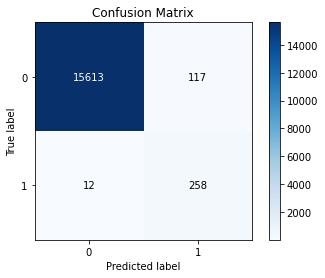

In [125]:
print("Accuracy Score ",accuracy_score(pred,test['class']))
print("Recall Score ",recall_score(pred,test['class']))
print(confusion_matrix(pred, test['class']))
skplt.metrics.plot_confusion_matrix(pred, test['class'], normalize=False)
plt.show()

In [126]:
tn, fp, fn, tp = confusion_matrix(pred,test['class']).ravel()
cost = 10*fp + 500*fn
print(cost)

7170


In [137]:
from prettytable import PrettyTable

table=PrettyTable()

table.field_names = ['Model','recall Score','cost']
table.add_row(['Logistic Regression',0.8392,23900])
table.add_row(['SVM', 0.9004,12350])
table.add_row(['KNN',0,3750])
table.add_row(['Decision Trees',0.8438,45590])
table.add_row(['Random Forest',0.9273,11570])
table.add_row(['Gradient Boosted Decision Trees', 0.8971,16960])
table.add_row(['XG Boosting',0.9572,7340])
table.add_row(['VotingClassifier', 0.9435,9410])
table.add_row(['Custom stacking classifer', 0.9477,8210])
table.add_row(['stacking classifer', 0.9555,7170])
print(table)

+---------------------------------+--------------+-------+
|              Model              | recall Score |  cost |
+---------------------------------+--------------+-------+
|       Logistic Regression       |    0.8392    | 23900 |
|               SVM               |    0.9004    | 12350 |
|               KNN               |      0       |  3750 |
|          Decision Trees         |    0.8438    | 45590 |
|          Random Forest          |    0.9273    | 11570 |
| Gradient Boosted Decision Trees |    0.8971    | 16960 |
|           XG Boosting           |    0.9572    |  7340 |
|         VotingClassifier        |    0.9435    |  9410 |
|    Custom stacking classifer    |    0.9477    |  8210 |
|        stacking classifer       |    0.9555    |  7170 |
+---------------------------------+--------------+-------+
